In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(33.97463012207993, 69.78321367149255),
 (45.36794812667384, -78.87087852177143),
 (-35.98798486483381, -15.062803055162988),
 (-9.193410875873894, 147.99675846232788),
 (-53.299386095548286, -47.195230071582216),
 (-76.17813090031999, -86.1263111468492),
 (-48.57172777573629, 125.68016261630214),
 (-3.489995604557265, -133.0754123836344),
 (-30.005972265064827, -4.4426098663944344),
 (74.5371071018676, 86.09016378090143),
 (4.69469215501536, -125.57276551272723),
 (57.68782536396725, 80.26482045856193),
 (-86.91260758583695, 71.94815012504361),
 (59.70452843906537, -51.452348854816705),
 (-48.16936210560128, -58.557579084985846),
 (-77.42790079147582, -118.49343141931797),
 (74.12123758146654, -43.98765640911765),
 (-12.456648891129703, -49.57491895377311),
 (-60.061373251180314, 38.477632058824355),
 (-23.673394240657885, 19.144114562582843),
 (25.027163399439146, 30.302370666078104),
 (75.31808214785315, 62.90886471357928),
 (-69.3315244682781, -22.917525439355558),
 (81.9303004980

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the time library and the datetime module from the datetime library 
import requests
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a91ded1f4967e7b04877255b544cbaa"

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        print(city_weather)
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | azrow
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 2 of Set 1 | huntsville
{'coord': {'lon': -86.5861, 'lat': 34.7304}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 50.43, 'feels_like': 46.69, 'temp_min': 48.15, 'temp_max': 52.92, 'pressure': 1019, 'humidity': 32}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 307, 'gust': 3}, 'clouds': {'all': 1}, 'dt': 1638220056, 'sys': {'type': 2, 'id': 2009569, 'country': 'US', 'sunrise': 1638189241, 'sunset': 1638225355}, 'timezone': -21600, 'id': 4068590, 'name': 'Huntsville', 'cod': 200}
Processing Record 3 of Set 1 | jamestown
{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 32.43, 'feels_like': 28.58, 'temp_min

{'coord': {'lon': 19.1167, 'lat': -24.1333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.16, 'feels_like': 67.3, 'temp_min': 70.16, 'temp_max': 70.16, 'pressure': 1012, 'humidity': 9, 'sea_level': 1012, 'grnd_level': 884}, 'visibility': 10000, 'wind': {'speed': 6.13, 'deg': 204, 'gust': 11.9}, 'clouds': {'all': 0}, 'dt': 1638220059, 'sys': {'country': 'NA', 'sunrise': 1638157645, 'sunset': 1638206202}, 'timezone': 7200, 'id': 3358666, 'name': 'Aranos', 'cod': 200}
Processing Record 18 of Set 1 | sohag
{'coord': {'lon': 31.6948, 'lat': 26.557}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.55, 'feels_like': 74.8, 'temp_min': 76.55, 'temp_max': 76.55, 'pressure': 1016, 'humidity': 19, 'sea_level': 1016, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.74, 'deg': 115, 'gust': 4.92}, 'clouds': {'all': 4}, 'dt': 163822

{'coord': {'lon': 122.1353, 'lat': 7.7061}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.46, 'feels_like': 80.01, 'temp_min': 78.46, 'temp_max': 78.46, 'pressure': 1008, 'humidity': 85, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 5.26, 'deg': 20, 'gust': 6.11}, 'clouds': {'all': 86}, 'dt': 1638220062, 'sys': {'country': 'PH', 'sunrise': 1638222535, 'sunset': 1638264693}, 'timezone': 28800, 'id': 1686123, 'name': 'Siocon', 'cod': 200}
Processing Record 37 of Set 1 | imbituba
{'coord': {'lon': -48.6703, 'lat': -28.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.29, 'feels_like': 89.78, 'temp_min': 82.29, 'temp_max': 82.29, 'pressure': 1001, 'humidity': 81, 'sea_level': 1001, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 127, 'gust': 4.85}, 'clouds': {'all': 0}

{'coord': {'lon': -133.0374, 'lat': 69.4541}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -13.13, 'feels_like': -25.73, 'temp_min': -13.13, 'temp_max': -13.13, 'pressure': 1016, 'humidity': 95, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 8131, 'wind': {'speed': 13.71, 'deg': 281, 'gust': 22.82}, 'clouds': {'all': 100}, 'dt': 1638220126, 'sys': {'country': 'CA', 'sunrise': 0, 'sunset': 0}, 'timezone': -25200, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}
Processing Record 3 of Set 2 | saint-philippe
{'coord': {'lon': 55.7679, 'lat': -21.3585}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.13, 'feels_like': 74.14, 'temp_min': 71.11, 'temp_max': 76.55, 'pressure': 1017, 'humidity': 85, 'sea_level': 1017, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 7.76, 'deg': 127, 'gust': 6.89}, 'clouds': {

{'coord': {'lon': 116.8463, 'lat': -20.7377}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.11, 'feels_like': 82.65, 'temp_min': 80.11, 'temp_max': 80.11, 'pressure': 1008, 'humidity': 66, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 9.98, 'deg': 257, 'gust': 16.2}, 'clouds': {'all': 3}, 'dt': 1638220129, 'sys': {'country': 'AU', 'sunrise': 1638220980, 'sunset': 1638268787}, 'timezone': 28800, 'id': 6620339, 'name': 'Karratha', 'cod': 200}
Processing Record 18 of Set 2 | eskasem
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 19 of Set 2 | port lincoln
{'coord': {'lon': 135.8667, 'lat': -34.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 67.86, 'feels_like': 66.83, 'temp_min': 67.86, 'temp_max': 67.86, 'pressure': 1010, 'humidity': 53, 'sea_level'

{'coord': {'lon': -90.7195, 'lat': 29.5958}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.81, 'feels_like': 63.48, 'temp_min': 61, 'temp_max': 66.2, 'pressure': 1020, 'humidity': 53, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 7.14, 'deg': 24, 'gust': 7.96}, 'clouds': {'all': 0}, 'dt': 1638220133, 'sys': {'type': 2, 'id': 2021661, 'country': 'US', 'sunrise': 1638189549, 'sunset': 1638227032}, 'timezone': -21600, 'id': 4328010, 'name': 'Houma', 'cod': 200}
Processing Record 35 of Set 2 | vaini
{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.56, 'feels_like': 87.28, 'temp_min': 82.56, 'temp_max': 82.56, 'pressure': 1015, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1638220133, 'sys': {'type': 1, 

{'coord': {'lon': 21.1007, 'lat': 44.4677}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.05, 'feels_like': 31.26, 'temp_min': 37, 'temp_max': 38.05, 'pressure': 1005, 'humidity': 67, 'sea_level': 1005, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 9.91, 'deg': 330, 'gust': 14.23}, 'clouds': {'all': 100}, 'dt': 1638220137, 'sys': {'type': 2, 'id': 2020379, 'country': 'RS', 'sunrise': 1638164982, 'sunset': 1638197912}, 'timezone': 3600, 'id': 786827, 'name': 'Lozovik', 'cod': 200}
Processing Record 50 of Set 2 | caravelas
{'coord': {'lon': -39.2481, 'lat': -17.7125}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.62, 'feels_like': 79.99, 'temp_min': 78.62, 'temp_max': 78.62, 'pressure': 1007, 'humidity': 81, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 13.4, 'deg': 26, 'gust': 

{'coord': {'lon': -127.4199, 'lat': 50.6996}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 50.45, 'feels_like': 49.28, 'temp_min': 50.45, 'temp_max': 50.45, 'pressure': 1018, 'humidity': 87, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 10.02, 'deg': 130, 'gust': 15.3}, 'rain': {'1h': 0.21}, 'clouds': {'all': 100}, 'dt': 1638220201, 'sys': {'country': 'CA', 'sunrise': 1638202048, 'sunset': 1638232154}, 'timezone': -28800, 'id': 6111862, 'name': 'Port Hardy', 'cod': 200}
Processing Record 14 of Set 3 | meulaboh
{'coord': {'lon': 96.1285, 'lat': 4.1363}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.1, 'feels_like': 75.58, 'temp_min': 74.1, 'temp_max': 74.1, 'pressure': 1010, 'humidity': 93, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 9640, 'wind': {'speed': 1.9, 'deg': 328, 'gust': 

{'coord': {'lon': 19.2345, 'lat': -34.4187}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.8, 'feels_like': 55.76, 'temp_min': 56.8, 'temp_max': 61.9, 'pressure': 1015, 'humidity': 76, 'sea_level': 1015, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 10.69, 'deg': 293, 'gust': 16.22}, 'clouds': {'all': 59}, 'dt': 1638220205, 'sys': {'type': 2, 'id': 2006131, 'country': 'ZA', 'sunrise': 1638156267, 'sunset': 1638207524}, 'timezone': 7200, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
Processing Record 30 of Set 3 | yarada
{'coord': {'lon': 83.2667, 'lat': 17.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.56, 'feels_like': 76.01, 'temp_min': 75.56, 'temp_max': 75.56, 'pressure': 1013, 'humidity': 68, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.06, 'deg': 26, 'gust': 

{'coord': {'lon': 171.65, 'lat': -43.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 63.37, 'feels_like': 62.33, 'temp_min': 63.37, 'temp_max': 63.37, 'pressure': 1017, 'humidity': 62, 'sea_level': 1017, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 5.73, 'deg': 177, 'gust': 5.5}, 'clouds': {'all': 100}, 'dt': 1638220209, 'sys': {'country': 'NZ', 'sunrise': 1638204485, 'sunset': 1638258970}, 'timezone': 46800, 'id': 2186895, 'name': 'Methven', 'cod': 200}
Processing Record 45 of Set 3 | ures
{'coord': {'lon': -110.4, 'lat': 29.4333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.02, 'feels_like': 81.45, 'temp_min': 83.25, 'temp_max': 85.28, 'pressure': 1014, 'humidity': 23, 'sea_level': 1014, 'grnd_level': 972}, 'visibility': 10000, 'wind': {'speed': 2.91, 'deg': 210, 'gust': 3.15}, 'clouds': {'all': 10}, '

{'coord': {'lon': 54.0924, 'lat': 17.0151}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.69, 'feels_like': 79.54, 'temp_min': 80.69, 'temp_max': 80.69, 'pressure': 1015, 'humidity': 29}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1638220272, 'sys': {'type': 1, 'id': 7562, 'country': 'OM', 'sunrise': 1638239797, 'sunset': 1638280100}, 'timezone': 14400, 'id': 286621, 'name': 'Salalah', 'cod': 200}
Processing Record 10 of Set 4 | crab hill
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 11 of Set 4 | korla
{'coord': {'lon': 86.1469, 'lat': 41.7597}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22.66, 'feels_like': 15.37, 'temp_min': 22.66, 'temp_max': 22.66, 'pressure': 1039, 'humidity': 74, 'sea_level': 1039, 'grnd_level': 922}, 'visibility': 100

{'coord': {'lon': -151.0167, 'lat': -16.7}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.76, 'feels_like': 85.37, 'temp_min': 80.76, 'temp_max': 80.76, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 15.19, 'deg': 54, 'gust': 16.28}, 'rain': {'1h': 0.63}, 'clouds': {'all': 100}, 'dt': 1638220276, 'sys': {'country': 'PF', 'sunrise': 1638199304, 'sunset': 1638246226}, 'timezone': -36000, 'id': 4034496, 'name': 'Fare', 'cod': 200}
Processing Record 26 of Set 4 | kamenka
{'coord': {'lon': 42.7678, 'lat': 51.3223}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 46.74, 'feels_like': 37.58, 'temp_min': 46.74, 'temp_max': 46.74, 'pressure': 997, 'humidity': 86, 'sea_level': 997, 'grnd_level': 978}, 'visibility': 10000, 'wind': {'speed': 30.27, 'deg': 165, 'gust': 55.97}, 'rai

{'coord': {'lon': 18.6261, 'lat': 49.7461}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 30.11, 'feels_like': 23.72, 'temp_min': 26.92, 'temp_max': 35.11, 'pressure': 1006, 'humidity': 97, 'sea_level': 1006, 'grnd_level': 972}, 'visibility': 253, 'wind': {'speed': 6.33, 'deg': 234, 'gust': 14.41}, 'snow': {'1h': 0.46}, 'clouds': {'all': 100}, 'dt': 1638220279, 'sys': {'type': 2, 'id': 2012597, 'country': 'CZ', 'sunrise': 1638166724, 'sunset': 1638197359}, 'timezone': 3600, 'id': 3077882, 'name': 'Český Těšín', 'cod': 200}
Processing Record 41 of Set 4 | jega
{'coord': {'lon': 4.3792, 'lat': 12.2175}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.81, 'feels_like': 75.9, 'temp_min': 77.81, 'temp_max': 77.81, 'pressure': 1011, 'humidity': 13, 'sea_level': 1011, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 10.31, 'deg': 

{'coord': {'lon': 15.9492, 'lat': 69.1036}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.49, 'feels_like': 10.89, 'temp_min': 21.02, 'temp_max': 30.11, 'pressure': 996, 'humidity': 66, 'sea_level': 996, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 15.52, 'deg': 176, 'gust': 15.35}, 'clouds': {'all': 100}, 'dt': 1638220343, 'sys': {'type': 1, 'id': 1603, 'country': 'NO', 'sunrise': 1638180567, 'sunset': 1638184801}, 'timezone': 3600, 'id': 3145148, 'name': 'Myre', 'cod': 200}
Processing Record 6 of Set 5 | canandaigua
{'coord': {'lon': -77.288, 'lat': 42.8742}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 32.36, 'feels_like': 27.48, 'temp_min': 30.34, 'temp_max': 34.63, 'pressure': 1013, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 268, 'gust': 8.01}, 'clouds': {'all': 13}, 'dt': 1638

{'coord': {'lon': -53.6735, 'lat': 66.9395}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.62, 'feels_like': 24.53, 'temp_min': 31.62, 'temp_max': 31.62, 'pressure': 996, 'humidity': 91, 'sea_level': 996, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 7.76, 'deg': 91, 'gust': 8.59}, 'clouds': {'all': 100}, 'dt': 1638220347, 'sys': {'country': 'GL', 'sunrise': 1638192801, 'sunset': 1638205994}, 'timezone': -10800, 'id': 3419842, 'name': 'Sisimiut', 'cod': 200}
Processing Record 21 of Set 5 | vestmannaeyjar
{'coord': {'lon': -20.2734, 'lat': 63.4427}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 36.25, 'feels_like': 23.65, 'temp_min': 36.25, 'temp_max': 36.25, 'pressure': 1004, 'humidity': 91, 'sea_level': 1004, 'grnd_level': 1003}, 'visibility': 4122, 'wind': {'speed': 37.8, 'deg': 106, 'gust': 45.07}, 

{'coord': {'lon': -7.7169, 'lat': 4.375}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.83, 'feels_like': 79.83, 'temp_min': 79.83, 'temp_max': 79.83, 'pressure': 1012, 'humidity': 77, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 159, 'gust': 5.93}, 'clouds': {'all': 100}, 'dt': 1638220351, 'sys': {'country': 'LR', 'sunrise': 1638166965, 'sunset': 1638209765}, 'timezone': 0, 'id': 2276492, 'name': 'Harper', 'cod': 200}
Processing Record 37 of Set 5 | boueni
{'coord': {'lon': 45.0761, 'lat': -12.9025}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.78, 'feels_like': 78.78, 'temp_min': 78.78, 'temp_max': 78.78, 'pressure': 1012, 'humidity': 79, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.72, 'deg': 5, 'gust': 10.16}, 'rain': {'1h': 0.11}, 'clo

{'coord': {'lon': 6.1333, 'lat': 62.5833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 36.99, 'feels_like': 27.63, 'temp_min': 32.05, 'temp_max': 37.54, 'pressure': 986, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 140}, 'rain': {'1h': 0.15}, 'clouds': {'all': 75}, 'dt': 1638220415, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1638174609, 'sunset': 1638195471}, 'timezone': 3600, 'id': 3141667, 'name': 'Roald', 'cod': 200}
Processing Record 3 of Set 6 | saint-pierre
{'coord': {'lon': 55.4781, 'lat': -21.3393}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.47, 'feels_like': 74.32, 'temp_min': 71.19, 'temp_max': 76.64, 'pressure': 1015, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 110}, 'clouds': {'all': 40}, 'dt': 1638220415, 'sys': {'type': 1, 'id': 2127, 'coun

{'coord': {'lon': 150.1833, 'lat': -35.7167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 61.81, 'feels_like': 61.07, 'temp_min': 61.11, 'temp_max': 70.2, 'pressure': 1018, 'humidity': 72, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 1.3, 'deg': 352, 'gust': 3.44}, 'clouds': {'all': 7}, 'dt': 1638220418, 'sys': {'type': 2, 'id': 2039610, 'country': 'AU', 'sunrise': 1638211034, 'sunset': 1638262728}, 'timezone': 39600, 'id': 2176639, 'name': 'Batemans Bay', 'cod': 200}
Processing Record 17 of Set 6 | praxedis guerrero
{'coord': {'lon': -106.0167, 'lat': 31.3667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.89, 'feels_like': 63.59, 'temp_min': 64.56, 'temp_max': 66.42, 'pressure': 1018, 'humidity': 30, 'sea_level': 1018, 'grnd_level': 899}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 

{'coord': {'lon': -151.2583, 'lat': 60.5544}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 12.9, 'feels_like': 0.3, 'temp_min': 10.49, 'temp_max': 16.14, 'pressure': 995, 'humidity': 86}, 'visibility': 3219, 'wind': {'speed': 23.02, 'deg': 30, 'gust': 33.38}, 'clouds': {'all': 90}, 'dt': 1638220422, 'sys': {'type': 1, 'id': 7680, 'country': 'US', 'sunrise': 1638211299, 'sunset': 1638234348}, 'timezone': -32400, 'id': 5866063, 'name': 'Kenai', 'cod': 200}
Processing Record 32 of Set 6 | sentyabrskiy
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 33 of Set 6 | san jeronimo
{'coord': {'lon': -75.2829, 'lat': -11.9472}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.89, 'feels_like': 59.36, 'temp_min': 60.89, 'temp_max': 6

{'coord': {'lon': 127.7558, 'lat': 26.1842}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.88, 'feels_like': 71.33, 'temp_min': 68.68, 'temp_max': 70.88, 'pressure': 1015, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1638220426, 'sys': {'type': 1, 'id': 8137, 'country': 'JP', 'sunrise': 1638223118, 'sunset': 1638261411}, 'timezone': 32400, 'id': 1855342, 'name': 'Nishihara', 'cod': 200}
Processing Record 48 of Set 6 | baherden
{'coord': {'lon': 57.4316, 'lat': 38.4362}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.21, 'feels_like': 51.44, 'temp_min': 54.21, 'temp_max': 54.21, 'pressure': 1019, 'humidity': 45, 'sea_level': 1019, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 181, 'gust': 2.19}, 'clouds': {'all': 52}, 'dt': 1638220426,

{'coord': {'lon': -3.0667, 'lat': 13.0667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 79.36, 'feels_like': 79.36, 'temp_min': 79.36, 'temp_max': 79.36, 'pressure': 1011, 'humidity': 12, 'sea_level': 1011, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 82, 'gust': 15.37}, 'clouds': {'all': 4}, 'dt': 1638220489, 'sys': {'country': 'BF', 'sunrise': 1638166688, 'sunset': 1638207810}, 'timezone': 0, 'id': 2354176, 'name': 'Tougan', 'cod': 200}
Processing Record 15 of Set 7 | dunedin
{'coord': {'lon': 170.5036, 'lat': -45.8742}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.81, 'feels_like': 60.37, 'temp_min': 61.81, 'temp_max': 61.81, 'pressure': 1018, 'humidity': 57, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 216, 'gust': 8.86}, 'clouds': {'all': 72}, 'd

{'coord': {'lon': 33.6, 'lat': -11.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.22, 'feels_like': 68.16, 'temp_min': 68.22, 'temp_max': 68.22, 'pressure': 1013, 'humidity': 73, 'sea_level': 1013, 'grnd_level': 869}, 'visibility': 10000, 'wind': {'speed': 11.56, 'deg': 82, 'gust': 27.96}, 'clouds': {'all': 5}, 'dt': 1638220493, 'sys': {'country': 'MW', 'sunrise': 1638155484, 'sunset': 1638201409}, 'timezone': 7200, 'id': 925498, 'name': 'Mzimba', 'cod': 200}
Processing Record 30 of Set 7 | ambilobe
{'coord': {'lon': 49.05, 'lat': -13.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 74.82, 'feels_like': 75.9, 'temp_min': 74.82, 'temp_max': 74.82, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.95, 'deg': 76, 'gust': 12.68}, 'clouds': {'all': 23}, 'dt': 1638220

{'coord': {'lon': 148.6167, 'lat': -32.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.53, 'feels_like': 64.81, 'temp_min': 64.53, 'temp_max': 64.53, 'pressure': 1016, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 110}, 'clouds': {'all': 90}, 'dt': 1638220496, 'sys': {'type': 1, 'id': 9596, 'country': 'AU', 'sunrise': 1638211922, 'sunset': 1638262593}, 'timezone': 39600, 'id': 2168305, 'name': 'Dubbo', 'cod': 200}
Processing Record 44 of Set 7 | nelson bay
{'coord': {'lon': 152.15, 'lat': -32.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.93, 'feels_like': 70.66, 'temp_min': 64.78, 'temp_max': 70.95, 'pressure': 1016, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 30, 'gust': 4}, 'clouds': {'all': 100}, 'dt': 1638220497, 'sys': {'type': 2, 'id': 2035231, 'countr

{'coord': {'lon': 1.5176, 'lat': 50.012}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 35.35, 'feels_like': 28.26, 'temp_min': 35.31, 'temp_max': 37.49, 'pressure': 1018, 'humidity': 77, 'sea_level': 1018, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 253, 'gust': 20.18}, 'clouds': {'all': 40}, 'dt': 1638220560, 'sys': {'type': 2, 'id': 2011713, 'country': 'FR', 'sunrise': 1638170899, 'sunset': 1638201397}, 'timezone': 3600, 'id': 3034366, 'name': 'Beauchamps', 'cod': 200}
Processing Record 9 of Set 8 | siwana
{'coord': {'lon': 72.4167, 'lat': 25.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.54, 'feels_like': 66.97, 'temp_min': 68.54, 'temp_max': 68.54, 'pressure': 1015, 'humidity': 40, 'sea_level': 1015, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 5.35, 'deg': 55, 'g

{'coord': {'lon': -71.3436, 'lat': -29.9533}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 62.33, 'feels_like': 61.65, 'temp_min': 62.33, 'temp_max': 62.33, 'pressure': 1015, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 270}, 'clouds': {'all': 40}, 'dt': 1638220564, 'sys': {'type': 1, 'id': 8514, 'country': 'CL', 'sunrise': 1638178629, 'sunset': 1638228649}, 'timezone': -10800, 'id': 3893629, 'name': 'Coquimbo', 'cod': 200}
Processing Record 25 of Set 8 | geraldton
{'coord': {'lon': 114.6, 'lat': -28.7667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.81, 'feels_like': 64.18, 'temp_min': 60.13, 'temp_max': 64.81, 'pressure': 1013, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1638220565, 'sys': {'type': 1, 'id': 9522, 'country': 'AU'

{'coord': {'lon': 111.9767, 'lat': 43.6475}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.67, 'feels_like': 3.63, 'temp_min': 15.67, 'temp_max': 15.67, 'pressure': 1036, 'humidity': 64, 'sea_level': 1036, 'grnd_level': 917}, 'visibility': 10000, 'wind': {'speed': 9.8, 'deg': 288, 'gust': 15.99}, 'clouds': {'all': 0}, 'dt': 1638220568, 'sys': {'country': 'CN', 'sunrise': 1638229466, 'sunset': 1638262639}, 'timezone': 28800, 'id': 2037485, 'name': 'Erenhot', 'cod': 200}
Processing Record 40 of Set 8 | abalak
{'coord': {'lon': 68.5944, 'lat': 58.1286}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.32, 'feels_like': 14.16, 'temp_min': 22.32, 'temp_max': 22.32, 'pressure': 1018, 'humidity': 96, 'sea_level': 1018, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 6.6, 'deg': 229, 'gust': 21.3}, 'clouds': {'all': 100}

{'coord': {'lon': -114.0611, 'lat': 27.9769}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.84, 'feels_like': 78.84, 'temp_min': 78.84, 'temp_max': 78.84, 'pressure': 1015, 'humidity': 30, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 296, 'gust': 5.97}, 'clouds': {'all': 0}, 'dt': 1638220632, 'sys': {'country': 'MX', 'sunrise': 1638194954, 'sunset': 1638232834}, 'timezone': -25200, 'id': 4021858, 'name': 'Guerrero Negro', 'cod': 200}
Processing Record 6 of Set 9 | dingle
{'coord': {'lon': 122.6711, 'lat': 10.9995}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74.46, 'feels_like': 75.94, 'temp_min': 74.46, 'temp_max': 74.46, 'pressure': 1008, 'humidity': 92, 'sea_level': 1008, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 5.44, 'deg': 351, 'gust': 7.43}, 'clouds':

{'coord': {'lon': -125.7533, 'lat': 54.2331}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.42, 'feels_like': 17.44, 'temp_min': 22.42, 'temp_max': 22.42, 'pressure': 1014, 'humidity': 92, 'sea_level': 1014, 'grnd_level': 923}, 'visibility': 10000, 'wind': {'speed': 3.69, 'deg': 125, 'gust': 8.59}, 'clouds': {'all': 100}, 'dt': 1638220636, 'sys': {'type': 1, 'id': 438, 'country': 'CA', 'sunrise': 1638202654, 'sunset': 1638230748}, 'timezone': -28800, 'id': 5911745, 'name': 'Burns Lake', 'cod': 200}
Processing Record 23 of Set 9 | pirapo
{'coord': {'lon': -55.5333, 'lat': -26.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77.88, 'feels_like': 77.86, 'temp_min': 77.88, 'temp_max': 77.88, 'pressure': 1006, 'humidity': 53, 'sea_level': 1006, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 4.45, 'deg': 251, 'gust':

{'coord': {'lon': 149.55, 'lat': -6.2167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.3, 'feels_like': 79.3, 'temp_min': 79.3, 'temp_max': 79.3, 'pressure': 1008, 'humidity': 86, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.64, 'deg': 1, 'gust': 8.03}, 'clouds': {'all': 100}, 'dt': 1638220640, 'sys': {'country': 'PG', 'sunrise': 1638214624, 'sunset': 1638259442}, 'timezone': 36000, 'id': 2094746, 'name': 'Kandrian', 'cod': 200}
Processing Record 38 of Set 9 | lusambo
{'coord': {'lon': 23.45, 'lat': -4.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.62, 'feels_like': 70.93, 'temp_min': 69.62, 'temp_max': 69.62, 'pressure': 1011, 'humidity': 99, 'sea_level': 1011, 'grnd_level': 958}, 'visibility': 10000, 'wind': {'speed': 1.59, 'deg': 313, 'gust': 1.54}, 'clouds': {'all': 8

{'coord': {'lon': 60.1659, 'lat': 66.0317}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 9.3, 'feels_like': -2.88, 'temp_min': 9.3, 'temp_max': 9.3, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 1005}, 'visibility': 1644, 'wind': {'speed': 8.1, 'deg': 276, 'gust': 12.37}, 'snow': {'1h': 0.15}, 'clouds': {'all': 100}, 'dt': 1638220705, 'sys': {'country': 'RU', 'sunrise': 1638250975, 'sunset': 1638266006}, 'timezone': 10800, 'id': 1505579, 'name': 'Inta', 'cod': 200}
Processing Record 3 of Set 10 | gravdal
{'coord': {'lon': 13.5031, 'lat': 68.1214}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 28.29, 'feels_like': 20.3, 'temp_min': 28.08, 'temp_max': 28.29, 'pressure': 996, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 190}, 'snow': {'1h': 0.17}, 'clouds': {'all': 40}, 'dt': 1638220705, 'sys

{'coord': {'lon': 34.0758, 'lat': 0.4544}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 65.26, 'feels_like': 65.77, 'temp_min': 65.26, 'temp_max': 65.26, 'pressure': 1012, 'humidity': 91, 'sea_level': 1012, 'grnd_level': 879}, 'visibility': 10000, 'wind': {'speed': 5.64, 'deg': 162, 'gust': 11.7}, 'clouds': {'all': 99}, 'dt': 1638220708, 'sys': {'country': 'UG', 'sunrise': 1638242983, 'sunset': 1638286525}, 'timezone': 10800, 'id': 234077, 'name': 'Busia', 'cod': 200}
Processing Record 17 of Set 10 | tsihombe
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 18 of Set 10 | manokwari
{'coord': {'lon': 134.0833, 'lat': -0.8667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.33, 'feels_like': 79.92, 'temp_min': 78.33, 'temp_max': 78.33, 'pressure': 1007, 'humidity': 86, 'sea_level': 1007

{'coord': {'lon': -173.9833, 'lat': -18.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 81.28, 'feels_like': 83.59, 'temp_min': 81.28, 'temp_max': 81.28, 'pressure': 1013, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1638220712, 'sys': {'type': 1, 'id': 7292, 'country': 'TO', 'sunrise': 1638291015, 'sunset': 1638338387}, 'timezone': 46800, 'id': 4032420, 'name': 'Neiafu', 'cod': 200}
Processing Record 34 of Set 10 | te anau
{'coord': {'lon': 167.7167, 'lat': -45.4167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.87, 'feels_like': 56.08, 'temp_min': 57.87, 'temp_max': 57.87, 'pressure': 1019, 'humidity': 58, 'sea_level': 1019, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 333, 'gust': 1.7}, 'clouds': {'all': 73}, 'dt': 1638220713, 

{'coord': {'lon': 82.0711, 'lat': 57.0186}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.32, 'feels_like': 4.89, 'temp_min': 16.32, 'temp_max': 16.32, 'pressure': 1024, 'humidity': 78, 'sea_level': 1024, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 9.13, 'deg': 216, 'gust': 32.3}, 'clouds': {'all': 99}, 'dt': 1638220716, 'sys': {'country': 'RU', 'sunrise': 1638240184, 'sunset': 1638266280}, 'timezone': 25200, 'id': 1511057, 'name': 'Bakchar', 'cod': 200}
Processing Record 48 of Set 10 | patacamaya
{'coord': {'lon': -67.9167, 'lat': -17.2333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 58.03, 'feels_like': 55.92, 'temp_min': 58.03, 'temp_max': 58.03, 'pressure': 1005, 'humidity': 51, 'sea_level': 1005, 'grnd_level': 652}, 'visibility': 10000, 'wind': {'speed': 15.97, 'deg': 19, 'gust': 12.26}, 'cloud

{'coord': {'lon': 26.4384, 'lat': -15.7504}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.78, 'feels_like': 74.84, 'temp_min': 75.78, 'temp_max': 75.78, 'pressure': 1011, 'humidity': 38, 'sea_level': 1011, 'grnd_level': 903}, 'visibility': 10000, 'wind': {'speed': 3.98, 'deg': 88, 'gust': 4.25}, 'clouds': {'all': 96}, 'dt': 1638220780, 'sys': {'country': 'ZM', 'sunrise': 1638156811, 'sunset': 1638203520}, 'timezone': 7200, 'id': 901766, 'name': 'Namwala', 'cod': 200}
Processing Record 15 of Set 11 | killybegs
{'coord': {'lon': -8.45, 'lat': 54.6333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.44, 'feels_like': 43.03, 'temp_min': 49.44, 'temp_max': 49.44, 'pressure': 1015, 'humidity': 94, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 19.15, 'deg': 271, 'gust': 28.01}, 'clouds': {

{'coord': {'lon': -85.85, 'lat': 16.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 77.05, 'feels_like': 77.52, 'temp_min': 77.05, 'temp_max': 81, 'pressure': 1013, 'humidity': 65, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.31, 'deg': 1, 'gust': 9.57}, 'clouds': {'all': 43}, 'dt': 1638220783, 'sys': {'type': 1, 'id': 7098, 'country': 'HN', 'sunrise': 1638186904, 'sunset': 1638227339}, 'timezone': -21600, 'id': 3601402, 'name': 'Savannah Bight', 'cod': 200}
Processing Record 31 of Set 11 | victor harbor
{'coord': {'lon': 138.6167, 'lat': -35.5667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 69.01, 'feels_like': 67.86, 'temp_min': 68.2, 'temp_max': 69.89, 'pressure': 1010, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 7.45, 'deg': 26, 'gust': 12.75}, 'clouds': {'all':

{'coord': {'lon': -34.8086, 'lat': -7.4706}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.99, 'feels_like': 89.49, 'temp_min': 82.99, 'temp_max': 82.99, 'pressure': 1010, 'humidity': 74, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 10.85, 'deg': 81, 'gust': 13.62}, 'clouds': {'all': 59}, 'dt': 1638220787, 'sys': {'type': 1, 'id': 8391, 'country': 'BR', 'sunrise': 1638172341, 'sunset': 1638217397}, 'timezone': -10800, 'id': 3391889, 'name': 'Pitimbu', 'cod': 200}
Processing Record 46 of Set 11 | vilhena
{'coord': {'lon': -60.1458, 'lat': -12.7406}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 86.22, 'feels_like': 88.5, 'temp_min': 86.22, 'temp_max': 86.22, 'pressure': 1008, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1638220787,

{'coord': {'lon': -80.9, 'lat': -2.2333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.66, 'feels_like': 77.45, 'temp_min': 76.66, 'temp_max': 76.66, 'pressure': 1009, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1638220851, 'sys': {'type': 1, 'id': 8538, 'country': 'EC', 'sunrise': 1638183907, 'sunset': 1638227959}, 'timezone': -18000, 'id': 3655131, 'name': 'La Libertad', 'cod': 200}
Processing Record 10 of Set 12 | pyu
{'coord': {'lon': 96.4333, 'lat': 18.4833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.5, 'feels_like': 68.18, 'temp_min': 67.5, 'temp_max': 67.5, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.11, 'deg': 334, 'gust': 15.43}, 'clouds': {'all': 100}, 'dt': 1638220851, 's

{'coord': {'lon': 145.7667, 'lat': -16.9167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.44, 'feels_like': 80.4, 'temp_min': 78.12, 'temp_max': 83.07, 'pressure': 1008, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1638220854, 'sys': {'type': 1, 'id': 9490, 'country': 'AU', 'sunrise': 1638214455, 'sunset': 1638261428}, 'timezone': 36000, 'id': 2172797, 'name': 'Cairns', 'cod': 200}
Processing Record 24 of Set 12 | nizhnedevitsk
{'coord': {'lon': 38.3657, 'lat': 51.5419}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.65, 'feels_like': 52.52, 'temp_min': 53.65, 'temp_max': 53.65, 'pressure': 984, 'humidity': 81, 'sea_level': 984, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 26.6, 'deg': 188, 'gust': 46.13}, 'clouds': {'all': 100}, 'dt': 16382

{'coord': {'lon': 22.6667, 'lat': 37.8167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.78, 'feels_like': 52.11, 'temp_min': 51.19, 'temp_max': 57.22, 'pressure': 1006, 'humidity': 69, 'sea_level': 1006, 'grnd_level': 968}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 218, 'gust': 29.89}, 'clouds': {'all': 7}, 'dt': 1638220858, 'sys': {'type': 2, 'id': 2039794, 'country': 'GR', 'sunrise': 1638163460, 'sunset': 1638198683}, 'timezone': 7200, 'id': 256558, 'name': 'Nemea', 'cod': 200}
Processing Record 38 of Set 12 | traverse city
{'coord': {'lon': -85.6206, 'lat': 44.7631}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.02, 'feels_like': 30.02, 'temp_min': 32.38, 'temp_max': 36.34, 'pressure': 1012, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1638220858, 

{'coord': {'lon': 48.1414, 'lat': 54.5953}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.15, 'feels_like': 23.95, 'temp_min': 35.15, 'temp_max': 35.15, 'pressure': 1006, 'humidity': 92, 'sea_level': 1006, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 20.62, 'deg': 178, 'gust': 42.79}, 'clouds': {'all': 100}, 'dt': 1638220921, 'sys': {'type': 1, 'id': 9043, 'country': 'RU', 'sunrise': 1638247484, 'sunset': 1638275270}, 'timezone': 14400, 'id': 480884, 'name': "Tsil'na", 'cod': 200}
Processing Record 3 of Set 13 | skjervoy
{'coord': {'lon': 20.9714, 'lat': 70.0311}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 25.61, 'feels_like': 13.01, 'temp_min': 25.61, 'temp_max': 25.61, 'pressure': 999, 'humidity': 66, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 17.78, 'deg': 141, 'gust': 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Huntsville,34.7304,-86.5861,52.92,32,1,1.99,US,2021-11-29 21:07:36
1,Jamestown,42.0970,-79.2353,35.19,87,90,4.00,US,2021-11-29 21:05:31
2,Kokoda,-8.8785,147.7407,78.15,91,88,0.92,PG,2021-11-29 21:07:36
3,Mar Del Plata,-38.0023,-57.5575,60.87,90,1,18.01,AR,2021-11-29 21:07:37
4,Punta Arenas,-53.1500,-70.9167,51.91,46,40,27.63,CL,2021-11-29 21:05:04
5,Esperance,-33.8667,121.9000,59.36,70,100,12.19,AU,2021-11-29 21:07:37
6,Atuona,-9.8000,-139.0333,78.82,76,32,23.06,PF,2021-11-29 21:07:37
7,Dudinka,69.4058,86.1778,-14.62,96,100,6.22,RU,2021-11-29 21:07:37
8,Kedrovyy,56.1667,91.8167,23.41,88,99,6.80,RU,2021-11-29 21:07:38
9,Paamiut,61.9940,-49.6678,32.77,97,100,32.37,GL,2021-11-29 21:03:12


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Huntsville,US,2021-11-29 21:07:36,34.7304,-86.5861,52.92,32,1,1.99
1,Jamestown,US,2021-11-29 21:05:31,42.0970,-79.2353,35.19,87,90,4.00
2,Kokoda,PG,2021-11-29 21:07:36,-8.8785,147.7407,78.15,91,88,0.92
3,Mar Del Plata,AR,2021-11-29 21:07:37,-38.0023,-57.5575,60.87,90,1,18.01
4,Punta Arenas,CL,2021-11-29 21:05:04,-53.1500,-70.9167,51.91,46,40,27.63
5,Esperance,AU,2021-11-29 21:07:37,-33.8667,121.9000,59.36,70,100,12.19
6,Atuona,PF,2021-11-29 21:07:37,-9.8000,-139.0333,78.82,76,32,23.06
7,Dudinka,RU,2021-11-29 21:07:37,69.4058,86.1778,-14.62,96,100,6.22
8,Kedrovyy,RU,2021-11-29 21:07:38,56.1667,91.8167,23.41,88,99,6.80
9,Paamiut,GL,2021-11-29 21:03:12,61.9940,-49.6678,32.77,97,100,32.37


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

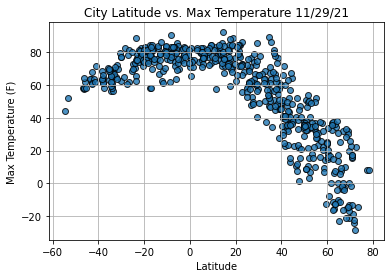

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

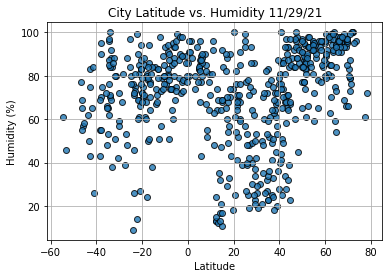

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

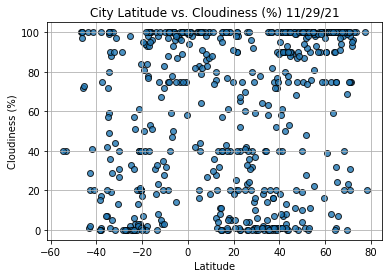

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

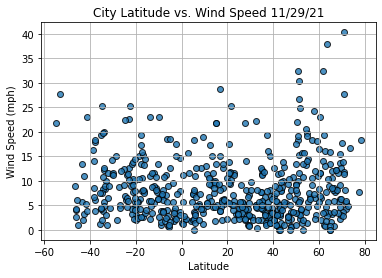

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
 # Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Huntsville,US,2021-11-29 21:07:36,34.7304,-86.5861,52.92,32,1,1.99
1,Jamestown,US,2021-11-29 21:05:31,42.0970,-79.2353,35.19,87,90,4.00
7,Dudinka,RU,2021-11-29 21:07:37,69.4058,86.1778,-14.62,96,100,6.22
8,Kedrovyy,RU,2021-11-29 21:07:38,56.1667,91.8167,23.41,88,99,6.80
9,Paamiut,GL,2021-11-29 21:03:12,61.9940,-49.6678,32.77,97,100,32.37


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

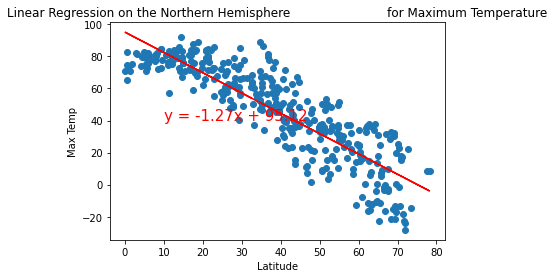

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

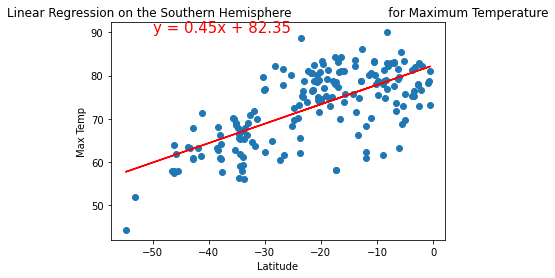

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

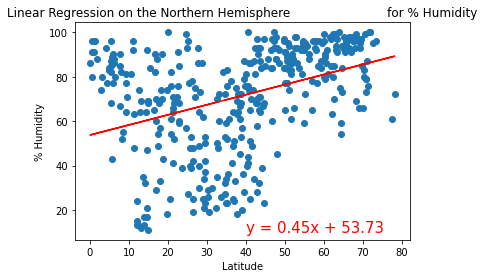

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

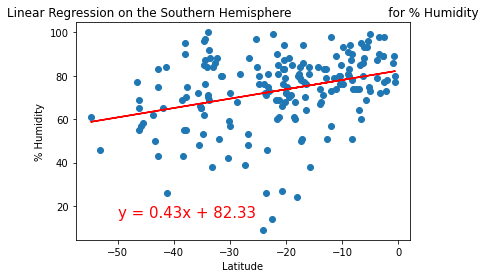

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

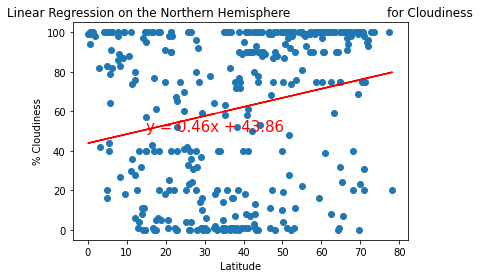

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', '% Cloudiness',(15,50))

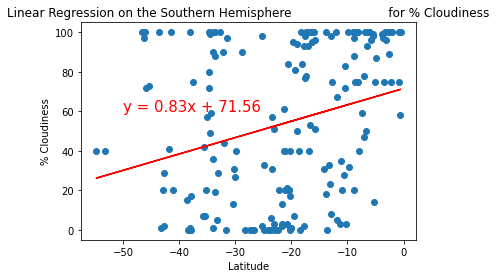

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

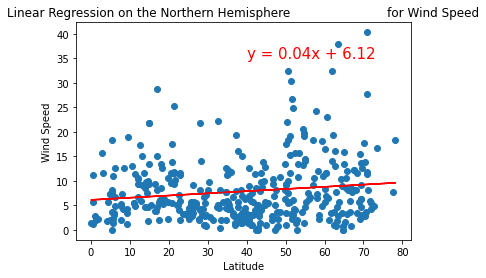

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

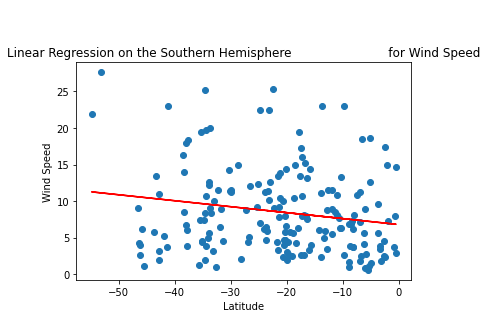

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))